In [1]:
#импорты
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize
from nltk import download
download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nltk.download('punkt')

import spacy
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

import pickle

In [3]:
#откроем датасет
df = pd.read_csv("/content/drive/MyDrive/English_texts.csv")
df

,Title,Text,Level
0,A day in the life of an airline pilot,Carole is an aeroplane pilot. She usually work...,A1
1,Where are you going to shop?,"Hi Karen, thanks for your message. Welcome to ...",A1
2,My next summer holiday plan,I usually teach English at a language school i...,A1
3,Email to a friend: I’m confined at home,To: DomParsons@nitromail.com\nFrom: JamesFShar...,A1
4,Memories of my first day at school,I remember my first day at school very well. I...,A1
...,...,...,...
195,English Pubs and their Signs,"The pub, people say, is the heart of British s...",C2
196,From smugglers to people traffickers - \nold a...,Smuggling contraband across the sea has been a...,C2
197,TEA and the British,"The father of modern economics, Adam Smith, on...",C2
198,All you need is Love - A (true) Celtic Fairy S...,"Angela's Ashes, the autobiographical novel by ...",C2


In [4]:
#предобработка текстов
def clean_text(text_str):
  text_str = text_str.lower() # нижний регистр
  text_list_nltk = word_tokenize(text_str) # токенизация
  text_clean = ' '.join([word for word in text_list_nltk if word not in stop_words and word[0].isalpha()]) # чистим от стоп-слов и пунктуации
  #doc = nlp(text_clean)
  #lemmatized_tokens = [token.lemma_ for token in doc] #лемматизация
  #lemmatized_text = ' '.join(lemmatized_tokens)
  return text_clean

In [5]:
df['Clean_text'] = df['Text'].apply(clean_text)
df

,Title,Text,Level,Clean_text
0,A day in the life of an airline pilot,Carole is an aeroplane pilot. She usually work...,A1,carole aeroplane pilot usually works week week...
1,Where are you going to shop?,"Hi Karen, thanks for your message. Welcome to ...",A1,hi karen thanks message welcome neighbourhood ...
2,My next summer holiday plan,I usually teach English at a language school i...,A1,usually teach english language school summer o...
3,Email to a friend: I’m confined at home,To: DomParsons@nitromail.com\nFrom: JamesFShar...,A1,domparsons nitromail.com jamesfsharp bmail.net...
4,Memories of my first day at school,I remember my first day at school very well. I...,A1,remember first day school well knew school qui...
...,...,...,...,...
195,English Pubs and their Signs,"The pub, people say, is the heart of British s...",C2,pub people say heart british social life place...
196,From smugglers to people traffickers - \nold a...,Smuggling contraband across the sea has been a...,C2,smuggling contraband across sea active busines...
197,TEA and the British,"The father of modern economics, Adam Smith, on...",C2,father modern economics adam smith described b...
198,All you need is Love - A (true) Celtic Fairy S...,"Angela's Ashes, the autobiographical novel by ...",C2,angela ashes autobiographical novel irish writ...


In [6]:
#векторизуем независимую переменную
tf_idf = TfidfVectorizer()

X = df['Clean_text']

X_vec = tf_idf.fit_transform(X)

X_vec.shape

(200, 9179)

In [7]:
#кодируем зависимую переменную
le = LabelEncoder()

y = df['Level'].tolist()

y_enc = le.fit_transform(y)

In [8]:
#разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_vec,
                                                    y_enc,
                                                    test_size=0.2,
                                                    stratify=y_enc,
                                                    random_state=42
                                                    )

In [25]:
#классификация
classifier = LogisticRegression(random_state=42, class_weight='balanced')

In [26]:
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [27]:
#получим предсказания
y_preds = classifier.predict(X_test)

In [ ]:
#посмотрим на результаты
print(classification_report(y_test, y_preds, target_names=le.classes_))

              precision    recall  f1-score   support

          A0       0.50      0.50      0.50         2
          A1       0.50      0.67      0.57         6
          A2       0.56      0.56      0.56         9
          B1       0.67      0.29      0.40         7
          B2       0.33      0.50      0.40         6
          C1       0.83      0.83      0.83         6
          C2       1.00      0.75      0.86         4

    accuracy                           0.57        40
   macro avg       0.63      0.58      0.59        40
weighted avg       0.62      0.57      0.58        40



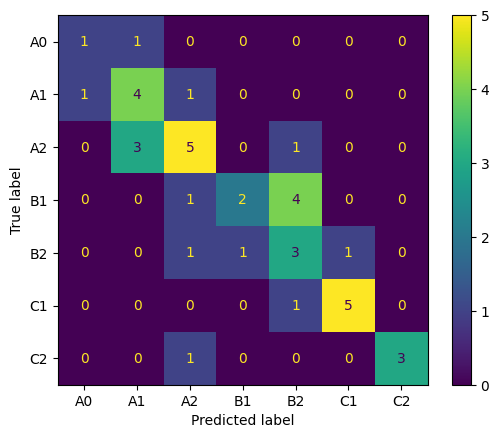

In [ ]:
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()

In [ ]:
f1_score(y_test, y_preds, average='weighted')

0.5764285714285714

In [38]:
#сохранение модели
filename = 'level_classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))
#сохранение векторайзера
pickle.dump(tf_idf, open("tfidf.pickle", "wb"))

In [9]:
#предсказания модели для новых данных см. в файле "тест модели"

In [10]:
#доп. вариант получения новых предсказаний через пайплайн (основной вариант см. в файле "тест модели")
pipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('clf', LogisticRegression())])

In [11]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [12]:
#случайный текст для теста
test_text = "I miss videos like this where you can tell the band doesn't take themselves seriously and are having fun. The eerie little melody in the back makes me feel nostalgic for something, but I'm not sure what. Then the lyrics caught me by surprise, totally different vibe. My emotions are confused."

In [13]:
test_clean = clean_text(test_text)

In [14]:
#модель предсказывает уровень А2
pipe.predict(["miss videos like tell band n't take seriously fun eerie little melody back makes feel nostalgic something sure lyrics caught surprise totally different vibe emotions confused"])

array(['A2'], dtype='<U2')

In [ ]:
#кросс-валидация
clf_for_cross_val = LogisticRegression(multi_class='ovr', class_weight='balanced')

In [ ]:
scoring = {'f1': 'f1_weighted'}

In [ ]:
cv_results = cross_validate(clf_for_cross_val,
                            X_train,
                            y_train,
                            cv=5,
                            scoring=scoring)

In [ ]:
#все результаты низкие
cv_results

{'fit_time': array([0.23262763, 0.43662333, 0.24285913, 0.21406364, 0.422158  ]),
 'score_time': array([0.00206041, 0.00259709, 0.00227308, 0.00225568, 0.00232077]),
 'test_f1': array([0.38357909, 0.36061508, 0.40354437, 0.3747062 , 0.38593074])}

In [ ]:
#gridsearchcv
model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

search = GridSearchCV(model, space, scoring='f1_weighted', n_jobs=-1, cv=cv)

In [ ]:
result = search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1680 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

In [ ]:
#скор все равно ниже, чем у основной модели, но можно попробовать использовать гиперпараметры
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.39699418636918643
Best Hyperparameters: {'C': 1, 'penalty': 'none', 'solver': 'sag'}


In [ ]:
#вторая модель с гиперпараметрами
classifier_2 = LogisticRegression(C=1,
                                  penalty=None,
                                  solver='sag',
                                  random_state=42,
                                  class_weight='balanced')

In [ ]:
classifier_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, class_weight='balanced', penalty=None, random_state=42,
                   solver='sag')

In [ ]:
y_preds_2 = classifier_2.predict(X_test)

In [ ]:
#даже с гиперпараметрами результаты все равно ниже, чем у первой модели
print(classification_report(y_test, y_preds_2, target_names=le.classes_))

              precision    recall  f1-score   support

          A0       0.33      0.50      0.40         2
          A1       0.50      0.67      0.57         6
          A2       0.60      0.67      0.63         9
          B1       0.40      0.29      0.33         7
          B2       0.38      0.50      0.43         6
          C1       1.00      0.67      0.80         6
          C2       1.00      0.50      0.67         4

    accuracy                           0.55        40
   macro avg       0.60      0.54      0.55        40
weighted avg       0.60      0.55      0.56        40



In [ ]:
#визуализация
X_embedded = TSNE(n_components=2, init='random', perplexity=3).fit_transform(X_vec)

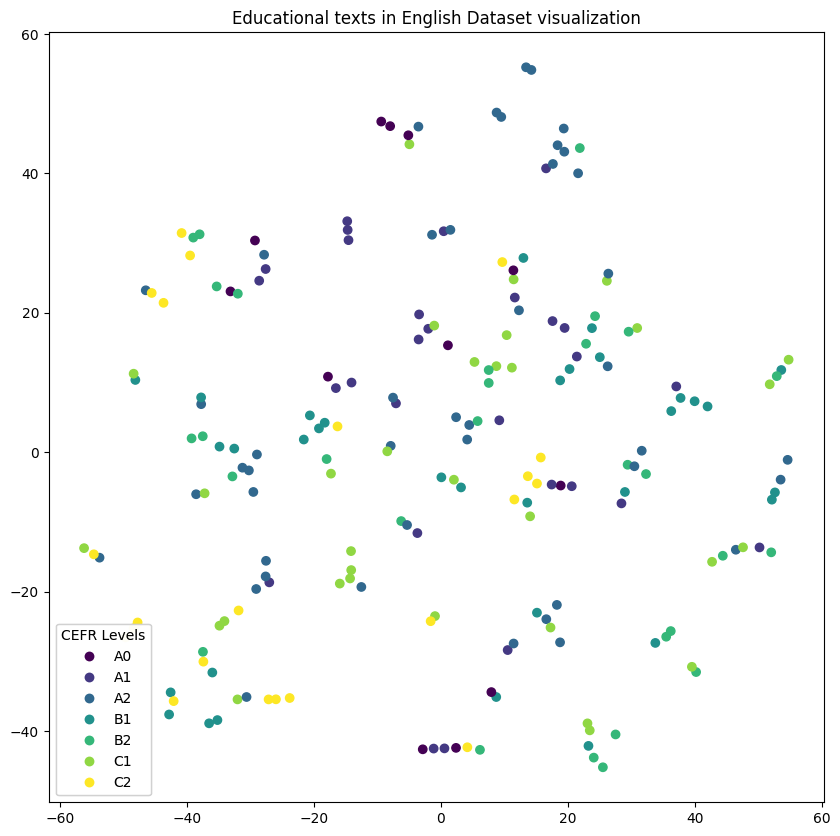

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

scatter = ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y_enc)

plt.title("Educational texts in English Dataset visualization")

mylabels = ["A0", "A1", "A2", "B1", "B2", "C1", "C2"]
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="CEFR Levels")
for i in range(0,7):
  legend.get_texts()[i].set_text(mylabels[i])

ax.add_artist(legend)



plt.show()